In [83]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

df_path = "Kaggle_data.xlsx"

In [84]:
df = pd.read_excel("Kaggle\Kaggle_data.xlsx")
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [85]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [94]:
education_unemployed_sum  = df[["Education","I am unemployed"]].groupby("Education").sum()
education_unemployed_count = df[["Education","I am unemployed"]].groupby("Education").count()
print(education_unemployed_count)
education_unemployed_percentage = education_unemployed_sum / education_unemployed_count
edu_lst_unord = education_unemployed_percentage.index
edu_lst_unord

                         I am unemployed
Education                               
Completed Masters                     49
Completed Phd                         10
Completed Undergraduate              100
High School or GED                    63
Some Phd                               8
Some Undergraduate                    82
Some highschool                       10
Some Masters                          12


Index(['Completed Masters', 'Completed Phd', 'Completed Undergraduate',
       'High School or GED', 'Some Phd', 'Some Undergraduate',
       'Some highschool', 'Some Masters'],
      dtype='object', name='Education')

In [88]:
edu_lst_unord[7]

'Some\xa0Masters'

In [89]:
df_mapping = pd.DataFrame({
    'Education': ["Some highschool", "High School or GED", "Some Undergraduate", "Completed Undergraduate",'Some\xa0Masters', "Completed Masters", "Some Phd", "Completed Phd"]
})

sort_mapping = df_mapping.reset_index().set_index("Education")
sort_mapping

,index
Education,
Some highschool,0
High School or GED,1
Some Undergraduate,2
Completed Undergraduate,3
Some Masters,4
Completed Masters,5
Some Phd,6
Completed Phd,7


In [90]:
education_unemployed_percentage.reset_index(inplace = True)
education_unemployed_percentage["sort"] = education_unemployed_percentage["Education"].map(sort_mapping['index'])
education_unemployed_percentage.sort_values('sort', inplace = True)
education_unemployed_percentage.drop('sort', axis = 1, inplace = True)
education_unemployed_percentage.set_index("Education", inplace =True)

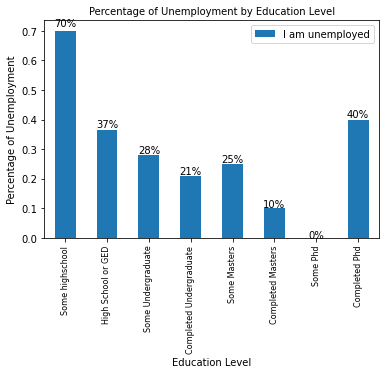

In [92]:
ed = education_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Education Level', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Education Level', fontsize=10)
plt.xticks(fontsize=8)
for p in ed.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ed.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [6]:
age_unemployed_sum = df[["Age","I am unemployed"]].groupby("Age").sum()
age_unemployed_count = df[["Age","I am unemployed"]].groupby("Age").count()
age_unemployed_percentage = age_unemployed_sum / age_unemployed_count
age_unemployed_percentage.sort_values(by="I am unemployed", ascending = False,inplace = True)

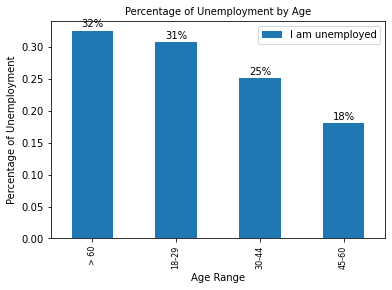

In [7]:
age = age_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Age', fontsize=10)
plt.xticks(fontsize=8)
for p in age.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    age.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [8]:
gender_unemployed_sum = df[["Gender","I am unemployed"]].groupby("Gender").sum()
gender_unemployed_count = df[["Gender","I am unemployed"]].groupby("Gender").count()
gender_unemployed_percentage = gender_unemployed_sum / gender_unemployed_count
gender_unemployed_percentage.sort_values(by="I am unemployed", ascending = False,inplace = True)

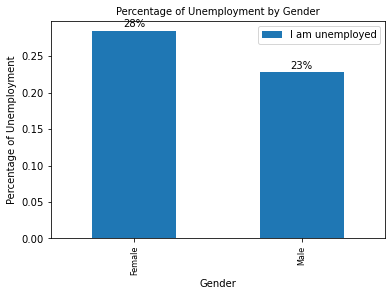

In [9]:
gender = gender_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Gender', fontsize=10)
plt.xticks(fontsize=8)
for p in gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    gender.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [10]:
income_unemployed_sum = df[["Household Income","I am unemployed"]].groupby("Household Income").sum()
income_unemployed_count = df[["Household Income","I am unemployed"]].groupby("Household Income").count()
income_unemployed_count

,I am unemployed
Household Income,
"$0-$9,999",27
"$10,000-$24,999",35
"$100,000-$124,999",24
"$125,000-$149,999",16
"$150,000-$174,999",14
"$175,000-$199,999",2
"$200,000+",20
"$25,000-$49,999",68
"$50,000-$74,999",57


In [11]:
income_unemployed_percentage = income_unemployed_sum / income_unemployed_count
income_unemployed_percentage.reset_index(inplace = True)
income_unemployed_percentage

,Household Income,I am unemployed
0,"$0-$9,999",0.629630
1,"$10,000-$24,999",0.257143
2,"$100,000-$124,999",0.083333
3,"$125,000-$149,999",0.000000
4,"$150,000-$174,999",0.214286
5,"$175,000-$199,999",0.500000
6,"$200,000+",0.050000
7,"$25,000-$49,999",0.220588
8,"$50,000-$74,999",0.298246
9,"$75,000-$99,999",0.212121


In [12]:
df_mapping = pd.DataFrame({
    'Household Income': ["$0-$9,999", "$10,000-$24,999", "$25,000-$49,999", "$50,000-$74,999", "$75,000-$99,999", "$100,000-$124,999", "$125,000-$149,999", "$150,000-$174,999", "$175,000-$199,999", "$200,000+", "Prefer not to answer"]
})

sort_mapping = df_mapping.reset_index().set_index("Household Income")
sort_mapping

,index
Household Income,
"$0-$9,999",0
"$10,000-$24,999",1
"$25,000-$49,999",2
"$50,000-$74,999",3
"$75,000-$99,999",4
"$100,000-$124,999",5
"$125,000-$149,999",6
"$150,000-$174,999",7
"$175,000-$199,999",8


In [13]:
income_unemployed_percentage["sort"] = income_unemployed_percentage["Household Income"].map(sort_mapping['index'])
income_unemployed_percentage.sort_values('sort', inplace = True)
income_unemployed_percentage.drop('sort', axis = 1, inplace = True)
income_unemployed_percentage

,Household Income,I am unemployed
0,"$0-$9,999",0.629630
1,"$10,000-$24,999",0.257143
7,"$25,000-$49,999",0.220588
8,"$50,000-$74,999",0.298246
9,"$75,000-$99,999",0.212121
2,"$100,000-$124,999",0.083333
3,"$125,000-$149,999",0.000000
4,"$150,000-$174,999",0.214286
5,"$175,000-$199,999",0.500000
6,"$200,000+",0.050000


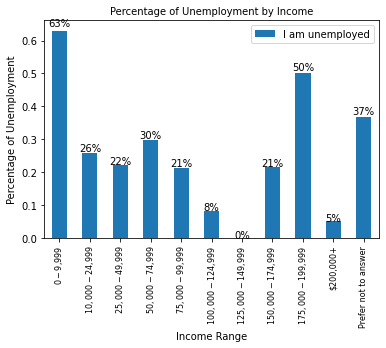

In [14]:
income = income_unemployed_percentage.plot(kind = "bar")
plt.xlabel('Income Range', fontsize=10)
plt.ylabel('Percentage of Unemployment', fontsize=10)
plt.title('Percentage of Unemployment by Income', fontsize=10)
plt.xticks(ticks = range(len(income_unemployed_percentage)), labels = income_unemployed_percentage['Household Income'], fontsize=8)
for p in income.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    income.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [69]:
education_mental_sum  = df[["Education","I identify as having a mental illness"]].groupby("Education").sum()
education_mental_count = df[["Education","I identify as having a mental illness"]].groupby("Education").count()
education_mental_percentage = education_mental_sum / education_mental_count
edu_lst_unord = education_mental_percentage.index
edu_lst_unord

Index(['Completed Masters', 'Completed Phd', 'Completed Undergraduate',
       'High School or GED', 'Some Phd', 'Some Undergraduate',
       'Some highschool', 'Some Masters'],
      dtype='object', name='Education')

In [70]:
sm = edu_lst_unord[7]
sm

'Some\xa0Masters'

In [71]:
df_mapping = pd.DataFrame({
    'Education': ["Some highschool", "High School or GED", "Some Undergraduate", "Completed Undergraduate",'Some\xa0Masters', "Completed Masters", "Some Phd", "Completed Phd"]
})

sort_mapping = df_mapping.reset_index().set_index("Education")
sort_mapping

,index
Education,
Some highschool,0
High School or GED,1
Some Undergraduate,2
Completed Undergraduate,3
Some Masters,4
Completed Masters,5
Some Phd,6
Completed Phd,7


In [72]:
education_mental_percentage.reset_index(inplace = True)
education_mental_percentage["sort"] = education_mental_percentage["Education"].map(sort_mapping['index'])
education_mental_percentage.sort_values('sort', inplace = True)
education_mental_percentage.drop('sort', axis = 1, inplace = True)
education_mental_percentage.set_index("Education", inplace = True)

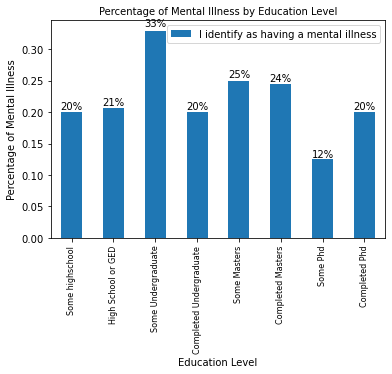

In [73]:
ed2 = education_mental_percentage.plot(kind = "bar")
plt.xlabel('Education Level', fontsize=10)
plt.ylabel('Percentage of Mental Illness', fontsize=10)
plt.title('Percentage of Mental Illness by Education Level', fontsize=10)
plt.xticks(fontsize=8)
for p in ed2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ed2.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
age_mental_sum  = df[["Age","I identify as having a mental illness"]].groupby("Age").sum()
age_mental_count = df[["Age","I identify as having a mental illness"]].groupby("Age").count()
age_mental_percentage = age_mental_sum / age_mental_count
age_mental_percentage.sort_values(by="I identify as having a mental illness", ascending = False,inplace = True)
age2 = age_mental_percentage.plot(kind = "bar")
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Percentage of Mental Illness', fontsize=10)
plt.title('Percentage of Mentall Illness by Age', fontsize=10)
plt.xticks(fontsize=8)
for p in age2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    age2.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
gender_mental_sum  = df[["Gender","I identify as having a mental illness"]].groupby("Gender").sum()
gender_mental_count = df[["Gender","I identify as having a mental illness"]].groupby("Gender").count()
gender_mental_percentage = gender_mental_sum / gender_mental_count
gender_mental_percentage.sort_values(by="I identify as having a mental illness", ascending = False,inplace = True)
gender2 = gender_mental_percentage.plot(kind = "bar")
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Percentage of Mental Illness', fontsize=10)
plt.title('Percentage of Mentall Illness by Gender', fontsize=10)
plt.xticks(fontsize=8)
for p in gender2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    gender2.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [ ]:
income_mental_sum = df[["Household Income","I identify as having a mental illness"]].groupby("Household Income").sum()
income_mental_count = df[["Household Income","I identify as having a mental illness"]].groupby("Household Income").count()
print(income_mental_count)
print(income_unemployed_count)

In [ ]:
income_mental_percentage = income_mental_sum / income_mental_count
income_mental_percentage.reset_index(inplace = True)
income_mental_percentage

In [ ]:
df_mapping = pd.DataFrame({
    'Household Income': ["$0-$9,999", "$10,000-$24,999", "$25,000-$49,999", "$50,000-$74,999", "$75,000-$99,999", "$100,000-$124,999", "$125,000-$149,999", "$150,000-$174,999", "$175,000-$199,999", "$200,000+", "Prefer not to answer"]
})

sort_mapping = df_mapping.reset_index().set_index("Household Income")
sort_mapping

In [ ]:
income_mental_percentage["sort"] = income_mental_percentage["Household Income"].map(sort_mapping['index'])
income_mental_percentage.sort_values('sort', inplace = True)
income_mental_percentage.drop('sort', axis = 1, inplace = True)
income_mental_percentage

In [ ]:
income_mental = income_mental_percentage.plot(kind = "bar")
plt.xlabel('Income Range', fontsize=10)
plt.ylabel('Percentage of Mental Illness', fontsize=10)
plt.title('Percentage of Mental Illness by Income', fontsize=10)
plt.xticks(ticks = range(len(income_mental_percentage)), labels = income_mental_percentage['Household Income'], fontsize=8)
for p in income_mental.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    income_mental.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')